In [1]:
from pynq.overlays.base import BaseOverlay
import time
from datetime import datetime
base = BaseOverlay("base.bit")


In [2]:
#import extra libraries needed for plotting (per https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/)
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [108]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Add a C++ function to reset all the GPIO pins on the chosen PMOD
void reset_gpio(){
    for (unsigned int j = 0; j <= 7; j = j + 1) { 
        write_gpio(j, 0);
        //write_gpio(pin,val)
        //we want the value reset to zero
        //12 pins, starts at 0
    }
}

In [52]:
#test turning on the light
reset_gpio()
n=1
write_gpio(n,1)
#write_gpio(2,1)
#write_gpio(3,1)


In [58]:
#blink on and off for 1s
reset_gpio()

while True:
    write_gpio(3,1) #turn on red LED
    time.sleep(1) #sleep 1s
    write_gpio(3,0) #turn off LED
    time.sleep(1) #sleep 1s

KeyboardInterrupt: 

In [ ]:
#test with a specific freq & duty cycle
reset_gpio()

#Define the frequency and duty cycle.
frequency = 1 #Can be any frequency, but probably want it at least in kHz range
duty_cycle = .5 #should be a percent from 0 to 1.

time_on = duty_cycle * (1/frequency)
time_off = (1-duty_cycle) * (1/frequency)

while True:
    write_gpio(3,1) #turn on red LED
    time.sleep(time_on) #sleep time_on
    write_gpio(3,0) #turn off LED
    time.sleep(time_off) #sleep time_off


In [77]:
#add for loop for the first duty cycle
reset_gpio()

#Define the frequency and duty cycle.
frequency = 1 #Can be any frequency, but probably want it at least in kHz range
duty_cycle = .50 #should be a percent from 0 to 1.

time_on = duty_cycle * (1/frequency)
time_off = (1-duty_cycle) * (1/frequency)

for n in range(10): #Run n times
    write_gpio(3,1) #turn on red LED
    time.sleep(time_on) #sleep with ON
    write_gpio(3,0) #turn off LED
    time.sleep(time_off) #sleep with OFF
    print(n)

#

0
1
2
3
4
5
6
7
8
9


In [82]:
#2 add a nested for loop to change the duty cycle
reset_gpio()

#Define the frequency. Duty cycle will be defined in outer for loop
frequency = 1 #Can be any frequency, but probably want it at least in kHz range
#duty_cycle = _ 

for j in range(5): 
    #This Outer Loop will cycle through the 0%,25%, 50%, 75%, 100% duty cycles!
    duty_cycle = j/4 #should be a percent from 0 to 1.
    time_on = duty_cycle * (1/frequency)
    time_off = (1-duty_cycle) * (1/frequency)
    
    for k in range(6): #This will run k times before going to the next duty cycles
        write_gpio(3,1) #turn on red LED
        time.sleep(time_on) #sleep with ON
        write_gpio(3,0) #turn off LED
        time.sleep(time_off) #sleep with OFF
    reset_gpio() # not needed but I'll do anyways



In [86]:
#2 add fringe case for 0%
reset_gpio()

#Define the frequency. Duty cycle will be defined in outer for loop
frequency = 1 #Can be any frequency, but probably want it at least in kHz range
#duty_cycle = _ 

for i in range(5): 
    #This Outer Loop will cycle through the 0%,25%, 50%, 75%, 100% duty cycles!
    duty_cycle = i/4 #should be a percent from 0 to 1.
    
    if duty_cycle == 0:
        for j in range(6): #This will run k times before going to the next duty cycles
            time_off = (1-duty_cycle) * (1/frequency)
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    
    else:
        time_on = duty_cycle * (1/frequency)
        time_off = (1-duty_cycle) * (1/frequency)
        for k in range(6): #This will run k times before going to the next duty cycles
            write_gpio(3,1) #turn on red LED
            time.sleep(time_on) #sleep with ON
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
            
    reset_gpio() # not needed but I'll do anyways

0
1
2
3
4


In [93]:
#2 final code
reset_gpio()

#Define the frequency. Duty cycle will be defined in outer for loop
frequency = 1 #Can be any frequency, but probably want it at least in kHz range

for i in range(5): 
    #This Outer Loop will cycle through the 0%,25%, 50%, 75%, 100% duty cycles!
    duty_cycle = i/4 #should be a percent from 0 to 1.
    
    if duty_cycle == 0: #Fringe case of 0% duty cycle
        for j in range(6): #This will run k times before going to the next duty cycles
            time_off = 1/frequency
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    
    elif duty_cycle == 1: #Fringe case of 100% duty cycle
        for n in range(6): #This will run k times before going to the next duty cycles
            time_on = 1/frequency
            write_gpio(3,1) #turn off LED
            time.sleep(time_on) #sleep with OFF
    
    else:
        time_on = duty_cycle * (1/frequency)
        time_off = (1-duty_cycle) * (1/frequency)
        for k in range(6): #This will run k times before going to the next duty cycles
            write_gpio(3,1) #turn on red LED
            time.sleep(time_on) #sleep with ON
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
            
    reset_gpio() # not needed but I'll do anyways

0
duty 0% 0
duty 0% 1
duty 0% 2
duty 0% 3
duty 0% 4
duty 0% 5
1
2
3
4
duty 100% 0
duty 100% 1
duty 100% 2
duty 100% 3
duty 100% 4
duty 100% 5


In [137]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Add a C++ function to reset all the GPIO pins on the chosen PMOD
void reset_gpio(){
    for (unsigned int j = 0; j <= 7; j = j + 1) { 
        write_gpio(j, 0);
        //write_gpio(pin,val)
        //we want the value reset to zero
        //12 pins, starts at 0
    }
}

In [6]:
#3 test frequencies to see when I no longer notice the "blinking" and instead see a bright/dim light.
#I will Adjust the following values:
    #frequency
    #p (the range of the nested for loops)
reset_gpio()

#Define the frequency. Duty cycle will be defined in outer for loop
frequency = 38 #Can be any frequency, but probably want it at least in kHz range
p = frequency*3
q = 1 #just for the 0%

for i in range(5): 
    #This Outer Loop will cycle through the 0%,25%, 50%, 75%, 100% duty cycles!
    duty_cycle = i/4 #should be a percent from 0 to 1.
    print("Duty Cycle is now: " + str(duty_cycle))
    if duty_cycle == 0: #Fringe case of 0% duty cycle
        for j in range(q): #This will run k times before going to the next duty cycles
            time_off = 1/frequency
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    elif duty_cycle == 1: #Fringe case of 100% duty cycle
        for n in range(p): #This will run k times before going to the next duty cycles
            time_on = 1/frequency
            write_gpio(3,1) #turn off LED
            time.sleep(time_on) #sleep with OFF
    else:
        time_on = duty_cycle * (1/frequency)
        time_off = (1-duty_cycle) * (1/frequency)
        for k in range(p): #This will run k times before going to the next duty cycles
            write_gpio(3,1) #turn on red LED
            time.sleep(time_on) #sleep with ON
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    reset_gpio() # not needed but I'll do anyways

Duty Cycle is now: 0.0
Duty Cycle is now: 0.25
Duty Cycle is now: 0.5
Duty Cycle is now: 0.75
Duty Cycle is now: 1.0


In [21]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Add a C++ function to reset all the GPIO pins on the chosen PMOD
void reset_gpio(){
    for (unsigned int j = 0; j <= 7; j = j + 1) { 
        write_gpio(j, 0);
        //write_gpio(pin,val)
        //we want the value reset to zero
        //12 pins, starts at 0
    }
}

In [12]:
#4 Find the PERCEIVED 25%, 50%, 75%, and 100% brightness

#variable for each desired PERCEIVED brightness:
Bright_25 = .25
Bright_50 = .50
Bright_75 = .75
Bright_100 = 1

#set duty cycle according to the desired brightness
Duty_25 = Bright_25**2.2
Duty_50 = Bright_50**2.2
Duty_75 = Bright_75**2.2
Duty_100 = Bright_100**2.2

print(Duty_25)
print(Duty_50)
print(Duty_75)
print(Duty_100)

0.04736614270344993
0.217637640824031
0.5310492251033824
1.0


In [14]:
#4
#variable for each desired PERCEIVED brightness:
Bright_0 = 0
Bright_25 = .25
Bright_50 = .50
Bright_75 = .75
Bright_100 = 1

#set duty cycle according to the desired brightness
Duty_0 = Bright_0**2.2
Duty_25 = Bright_25**2.2
Duty_50 = Bright_50**2.2
Duty_75 = Bright_75**2.2
Duty_100 = Bright_100**2.2

Duty_Cycle = [Duty_0, Duty_25, Duty_50, Duty_75, Duty_100]
print(Duty_Cycle)

[0.0, 0.04736614270344993, 0.217637640824031, 0.5310492251033824, 1.0]


In [23]:
#4 Cycle through each perceived brightness level
#variable for each desired PERCEIVED brightness:
Bright_0 = 0
Bright_25 = .25
Bright_50 = .50
Bright_75 = .75
Bright_100 = 1
bright=[0,25,50,75,100] #I could have used a set for brightness as well.
                        #I do use this set to print the current brightness % though.

#set duty cycle according to the desired brightness
Duty_0 = Bright_0**2.2
Duty_25 = Bright_25**2.2
Duty_50 = Bright_50**2.2
Duty_75 = Bright_75**2.2
Duty_100 = Bright_100**2.2

Duty_Cycle = [Duty_0, Duty_25, Duty_50, Duty_75, Duty_100]

reset_gpio()
frequency = 38 #This is the frequency I found in part 3
p = frequency*3 # have each go thru the first.
q = 1 #just for the 0%. I want to skip this, but I will leave it in
      #the nested for loop in case I will need it later. it will do
      #a single cycle (which will last 1/38 seconds).

for i in range(5): 
    #This Outer Loop will cycle through the 0%,25%, 50%, 75%, 100% duty cycles!
    print("Duty Cycle is now: " + str(Duty_Cycle[i]) + "\n and Perceived Brightness is now " + str(bright[i]) + "%.")
    if Duty_Cycle[i] == 0: #Fringe case of 0% duty cycle
        for j in range(q): #This will run k times before going to the next duty cycles
            time_off = 1/frequency
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    elif Duty_Cycle[i] == 1: #Fringe case of 100% duty cycle
        for n in range(p): #This will run k times before going to the next duty cycles
            time_on = 1/frequency
            write_gpio(3,1) #turn off LED
            time.sleep(time_on) #sleep with OFF
    else:
        time_on = Duty_Cycle[i] * (1/frequency)
        time_off = (1-Duty_Cycle[i]) * (1/frequency)
        for k in range(p): #This will run k times before going to the next duty cycles
            write_gpio(3,1) #turn on red LED
            time.sleep(time_on) #sleep with ON
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    reset_gpio() # not needed but I'll do anyways

Duty Cycle is now: 0.0
 and Perceived Brightness is now 0%.
Duty Cycle is now: 0.04736614270344993
 and Perceived Brightness is now 25%.
Duty Cycle is now: 0.217637640824031
 and Perceived Brightness is now 50%.
Duty Cycle is now: 0.5310492251033824
 and Perceived Brightness is now 75%.
Duty Cycle is now: 1.0
 and Perceived Brightness is now 100%.


In [24]:
#4 Adjust Brightness based on Duty Cycle
#variable for each desired Duty Cycle:
Duty_0 = 0
Duty_25 = 0.04736614270344993
Duty_50 = 0.217637640824031
Duty_75 = 0.5310492251033824
Duty_100 = 1.0

#Set Brightness as a function to the duty cycle chosen
Bright_0 = Duty_0**(1/2.2)
Bright_25 = Duty_25**(1/2.2)
Bright_50 = Duty_50**(1/2.2)
Bright_75 = Duty_75**(1/2.2)
Bright_100 = Duty_100**(1/2.2)

In [29]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Add a C++ function to reset all the GPIO pins on the chosen PMOD
void reset_gpio(){
    for (unsigned int j = 0; j <= 7; j = j + 1) { 
        write_gpio(j, 0);
        //write_gpio(pin,val)
        //we want the value reset to zero
        //12 pins, starts at 0
    }
}

In [30]:
#5 Varying the duty cycles and approximate the corresponding LED brightness (in the unit of %)
#variable for each desired Duty Cycle:
Duty_0 = 0
Duty_25 = 0.04736614270344993
Duty_50 = 0.217637640824031
Duty_75 = 0.5310492251033824
Duty_100 = 1.0
Duty_Cycle = [Duty_0,Duty_25,Duty_50,Duty_75,Duty_100]

#Set Brightness as a function to the duty cycle chosen
Bright_0 = Duty_0**(1/2.2)
Bright_25 = Duty_25**(1/2.2)
Bright_50 = Duty_50**(1/2.2)
Bright_75 = Duty_75**(1/2.2)
Bright_100 = Duty_100**(1/2.2)
bright = [Bright_0,Bright_25,Bright_50,Bright_75,Bright_100]
bright_percentage = [m * 100 for m in bright]

reset_gpio()
frequency = 38 #This is the frequency I found in part 3
p = frequency*3 # have each go thru the first.
q = 1 #just for the 0%. I want to skip this, but I will leave it in
      #the nested for loop in case I will need it later. it will do
      #a single cycle (which will last 1/38 seconds).

for i in range(5): 
    #This Outer Loop will cycle through the 0%,25%, 50%, 75%, 100% duty cycles!
    print("Duty Cycle is now: " + str(Duty_Cycle[i]) + "\n and Perceived Brightness is now " + str(bright_percentage[i]) + "%.")
    if Duty_Cycle[i] == 0: #Fringe case of 0% duty cycle
        for j in range(q): #This will run k times before going to the next duty cycles
            time_off = 1/frequency
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    elif Duty_Cycle[i] == 1: #Fringe case of 100% duty cycle
        for n in range(p): #This will run k times before going to the next duty cycles
            time_on = 1/frequency
            write_gpio(3,1) #turn off LED
            time.sleep(time_on) #sleep with OFF
    else:
        time_on = Duty_Cycle[i] * (1/frequency)
        time_off = (1-Duty_Cycle[i]) * (1/frequency)
        for k in range(p): #This will run k times before going to the next duty cycles
            write_gpio(3,1) #turn on red LED
            time.sleep(time_on) #sleep with ON
            write_gpio(3,0) #turn off LED
            time.sleep(time_off) #sleep with OFF
    reset_gpio() # not needed but I'll do anyways

Duty Cycle is now: 0
 and Perceived Brightness is now 0.0%.
Duty Cycle is now: 0.04736614270344993
 and Perceived Brightness is now 25.0%.
Duty Cycle is now: 0.217637640824031
 and Perceived Brightness is now 50.0%.
Duty Cycle is now: 0.5310492251033824
 and Perceived Brightness is now 75.0%.
Duty Cycle is now: 1.0
 and Perceived Brightness is now 100.0%.


Text(0.5, 1.0, 'The Logarithmic Relationship between Perceived Brightness and Duty Cycle')

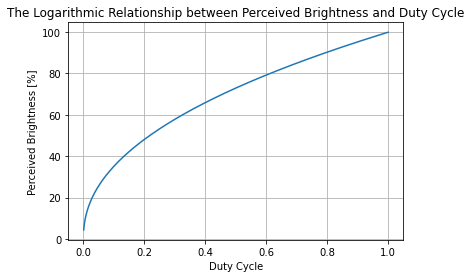

In [13]:
#5 Create a Graphic Relationship between Perceived Brightness and Duty Cycle

x = np.arange(0.001, 1, 0.001)
#y=x**2.2 #this is the EXPONENTIAL! it's actually logarithmic.
y = 100*(x**(1/2.2))
plt.plot(x, y)

plt.xlabel("Duty Cycle")
plt.ylabel("Perceived Brightness [%]")
plt.grid(True)
plt.title("The Logarithmic Relationship between Perceived Brightness and Duty Cycle")

In [36]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Add a C++ function to reset all the GPIO pins on the chosen PMOD
void reset_gpio(){
    for (unsigned int j = 0; j <= 7; j = j + 1) { 
        write_gpio(j, 0);
        //write_gpio(pin,val)
        //we want the value reset to zero
        //12 pins, starts at 0
    }
}

In [ ]:
#6: The next step is to use asyncio to start the program blink the LED
#red on/off in 1 second intervals,  have buttons 0,1,2 correspond to a Red,
#Green, and Blue led (with a constant intensity/duty cycle).
#Pressing Button 3 should stop the LED blinking.

#reset the gpio and get the buttons
import asyncio
btns = base.btns_gpio
reset_gpio()

duty = .25
frequency = 38
time_on = duty * (1/frequency)
time_off = (1-duty) * (1/frequency)

cond = True
startstop = True #to allow the LED to be (modulate) ON for 1s
Cycle_Off = True #to allow the LED to be off for 1s
Cycle_State = True # to see if LED is currently on (PMW on/off) or off completely
color = 3 #color of the light starts as red
                        
async def initial_flash(): #The initial (RED) flash for 1s
    global cond, start, startstop, color, time_on, time_off, frequency, Cycle_State, Cycle_Off
    while cond:
        #First if: for the "ON" portion (PMW)
        if startstop: #the PWM for the ON portion of any color
            Cycle_State = True #Logical true if the state is on
            for i in range(frequency):
                read_gpio(color)                                         #
                write_gpio(color,1) #turn on LED
                await asyncio.sleep(time_on)
                read_gpio(color)                                         #
                reset_gpio() #turn off LED
                await asyncio.sleep(time_off)
        else:
            for j in range(frequency):
                await asyncio.sleep(time_on)
                reset_gpio()
                await asyncio.sleep(time_off)
                reset_gpio()
        #Second if: The "Off" portion of the cycle
        if Cycle_Off == True: #the one second where the light is off completely
            Cycle_State = False #Logical False if the LED is cycled off
            for k in range(frequency):
                await asyncio.sleep(time_on)
                reset_gpio()
                await asyncio.sleep(time_off)
                reset_gpio()
        #Make an else for when btn3 has been pressed (startstop = flase)
        else:
            for l in range(frequency):
                read_gpio(color)                                          #
                write_gpio(color,1) #turn on LED
                await asyncio.sleep(time_on)
                read_gpio(color)                                          #
                reset_gpio() #turn off LED
                await asyncio.sleep(time_off)

#Function for button0, button1, and button2
async def buttons_012(_loop):
    global cond, start, startstop, color, Cycle_Off
    while cond:
        await asyncio.sleep(0.01)
        if base.buttons[0].read() or base.buttons[1].read() or base.buttons[2].read() != 0:
            startstop = True
            Cycle_Off = True
            #change the color
            if color == 3: #if currently red, change to green
                color = 2
            elif color == 2: #if currently green, change to blue
                color = 1
            else: #else (if currently blue), turn red
                color = 3                    

#Function for button3 to stop the cycle
async def button3(_loop):
    global cond, start, startstop, Cycle_State, Cycle_Off
    while cond:
        await asyncio.sleep(0.01)
        if base.buttons[3].read() !=0:
            if Cycle_State == True:
                Cycle_Off = False
            else:
                startstop = False


loop = asyncio.new_event_loop()
loop.create_task(initial_flash())
loop.create_task(buttons_012(loop))
loop.create_task(button3(loop))
loop.run_forever()
loop.close()        
print("Done.")


In [32]:
%%microblaze base.PMODB

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODB
void write_gpio(unsigned int pin, unsigned int val){
    if (val > 1){
        pyprintf("pin value must be 0 or 1");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
}

//Function to read the value of a selected pin of PMODB
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Add a C++ function to reset all the GPIO pins on the chosen PMOD
void reset_gpio(){
    for (unsigned int j = 0; j <= 7; j = j + 1) { 
        write_gpio(j, 0);
        //write_gpio(pin,val)
        //we want the value reset to zero
        //12 pins, starts at 0
    }
}

In [33]:
#7: Redo #6 but have each button be a set color instead of just cycling through the colors

#reset the gpio and get the buttons
import asyncio
btns = base.btns_gpio
reset_gpio()

duty = .25
frequency = 38
time_on = duty * (1/frequency)
time_off = (1-duty) * (1/frequency)

cond = True
startstop = True #to allow the LED to be (modulate) ON for 1s
Cycle_Off = True #to allow the LED to be off for 1s
Cycle_State = True # to see if LED is currently on (PMW on/off) or off completely
color = 3 #color of the light starts as red
                        
async def initial_flash(): #The initial (RED) flash for 1s
    global cond, start, startstop, color, time_on, time_off, frequency, Cycle_State, Cycle_Off
    while cond:
        #First if: for the "ON" portion (PMW)
        if startstop: #the PWM for the ON portion of any color
            Cycle_State = True #Logical true if the state is on
            for i in range(frequency):
                read_gpio(color)
                write_gpio(color,1) #turn on LED
                await asyncio.sleep(time_on)
                read_gpio(color)
                reset_gpio() #turn off LED
                await asyncio.sleep(time_off)
        else:
            for j in range(frequency):
                await asyncio.sleep(time_on+time_off)
        #Second if: The "Off" portion of the cycle
        if Cycle_Off == True: #the one second where the light is off completely
            Cycle_State = False #Logical False if the LED is cycled off
            reset_gpio()
            for k in range(frequency):
                await asyncio.sleep(time_on + time_off)
        #Make an else for when btn3 has been pressed (startstop = flase)
        else:
            for l in range(frequency):
                write_gpio(color,1) #turn on LED
                await asyncio.sleep(time_on)
                reset_gpio() #turn off LED
                await asyncio.sleep(time_off)

#Function for button0, turn red
async def button0(_loop):
    global cond, start, startstop, color, Cycle_Off
    while cond:
        await asyncio.sleep(0.01)
        if base.buttons[0].read() != 0:
            startstop = True
            Cycle_Off = True
            color = 3
#Function for button1, turn red
async def button1(_loop):
    global cond, start, startstop, color, Cycle_Off
    while cond:
        await asyncio.sleep(0.01)
        if base.buttons[1].read() != 0:
            startstop = True
            Cycle_Off = True
            color = 2
#Function for button0, turn red
async def button2(_loop):
    global cond, start, startstop, color, Cycle_Off
    while cond:
        await asyncio.sleep(0.01)
        if base.buttons[2].read() != 0:
            startstop = True
            Cycle_Off = True
            color = 1                   

#Function for button3 to stop the cycle
async def button3(_loop):
    global cond, start, startstop, Cycle_State, Cycle_Off
    while cond:
        await asyncio.sleep(0.01)
        if base.buttons[3].read() !=0:
            if Cycle_State == True:
                Cycle_Off = False
            else:
                startstop = False


loop = asyncio.new_event_loop()
loop.create_task(initial_flash())
loop.create_task(button0(loop))
loop.create_task(button1(loop))
loop.create_task(button2(loop))
loop.create_task(button3(loop))
loop.run_forever()
loop.close()        
print("Done.")


KeyboardInterrupt: 